<a href="https://colab.research.google.com/github/ncdanh0311/Danh-Data-Projects/blob/main/Liverpool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [11]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data_path = "/content/drive/MyDrive/DataAna/"

fixtures = pd.read_csv(data_path + "fixtures.csv")
df = pd.read_csv(data_path + "Liverpool stats.csv")


In [12]:
fixtures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   week        380 non-null    float64
 1   Day         380 non-null    object 
 2   Date        380 non-null    object 
 3   Time        380 non-null    object 
 4   Home        380 non-null    object 
 5   HomeScore   380 non-null    int64  
 6   Away        380 non-null    object 
 7   AwayScore   380 non-null    int64  
 8   Attendance  376 non-null    float64
 9   Venue       380 non-null    object 
 10  Referee     380 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 32.8+ KB


In [13]:
df.head(36)

player_id first_name         last_name  age nation  mp  starts    Mt  \
0           1    Allison            Becker   31    BRA  21      21  1890   
1           2     Virgil          Van Dijk   32    NED  23      23  2007   
2           3    Mohamed             Salah   31    EGY  21      20  1786   
3           4    Dominik        Szoboszlai   23    HUN  21      20  1657   
4           5      Trent  Alexander-Arnold   25    ENG  21      19  1622   
5           6       Luis              Diaz   27    COL  24      19  1568   
6           7     Alexis      Mac Allister   25    ARG  20      19  1541   
7           8     Darwin             Nunez   24    URU  24      16  1465   
8           9   Ibrahima            Konate   24    FRA  18      13  1242   
9          10      Diogo              Jota   27    POR  19      13  1047   
10         11     Curtis             Jones   23    ENG  17      12   956   
11         12        Joe             Gomez   26    ENG  21      11  1182   
12         13       Cody             Gakpo   24    NED  23      10   975   
13         14     Andrew         Robertson   29    SCO  12      10   954   
14         15     Wataru              Endo   31    JPN  17      10   883   
15         16       Joel             Matip   32    CMR  10       9   781   
16         17       Ryan       Gravenberch   21    NED  18       8   768   
17         18     Kostas          Tsimikas   27    GRE  11       8   665   
18         19   Caoimhin          Kelleher   25    IRL   4       4   360   
19         20     Jarell           Quansah   21    ENG   7       4   353   
20         21     Harvey           Elliott   20    ENG  21       3   583   
21         22      Conor           Bradley   20    NIR   3       3   231   
22         23      Bobby             Clark   19    ENG   3       0    17   
23         24        Ben              Doak   18    SCO   1       0    14   
24         25       Owen              Beck   21    WAL   1       0     8   
25         26     Thiago         Alcantara   32    ESP   1       0     6   
26         27      James          McConell   19    ENG   2       0     2   
27         28      Kaide            Gordon   19    ENG   1       0     1   
28         29     Adrian          Castillo   37    ESP   0       0     0   
29         30     Stefan          Bajcetic   19    ESP   0       0     0   
30         31       Luke          Chambers   19    ENG   0       0     0   
31         32      Lewis            Koumas   18    WAL   0       0     0   
32         33     Fabian            Mrozek   20    POL   0       0     0   
33         34       Trey             Nyoni   16    ENG   0       0     0   
34         35    Marcelo          Pitaluga   21    BRA   0       0     0   
35         36      Calum           Scanlon   19    ENG   0       0     0   

    full_match  goals  assist    pos  
0           21      0       0     GK  
1           22      1       2     DF  
2           20     15       9     FW  
3           18      3       2     MF  
4           18      2       4     DF  
5           17      5       3     FW  
6           17      2       1     MF  
7           16      9       7     FW  
8           14      0       0     DF  
9           12      9       3     FW  
10          11      1       1     MF  
11          13      0       1     DF  
12          11      4       3  FW,MF  
13          11      1       0     DF  
14          10      1       0     MF  
15           9      0       0     DF  
16           9      0       0     MF  
17           7      0       3     DF  
18           4      0       0     GK  
19           4      0       0     DF  
20           7      1       2  MF,FW  
21           3      1       3     DF  
22           0      0       0     MF  
23           0      0       0     FW  
24           0      0       0     DF  
25           0      0       0     MF  
26           0      0       0     MF  
27           0      0       0     FW  
28           0      0       0     GK  
29           0      0

In [15]:
# Set up the plotting environment
sns.set(style="whitegrid")

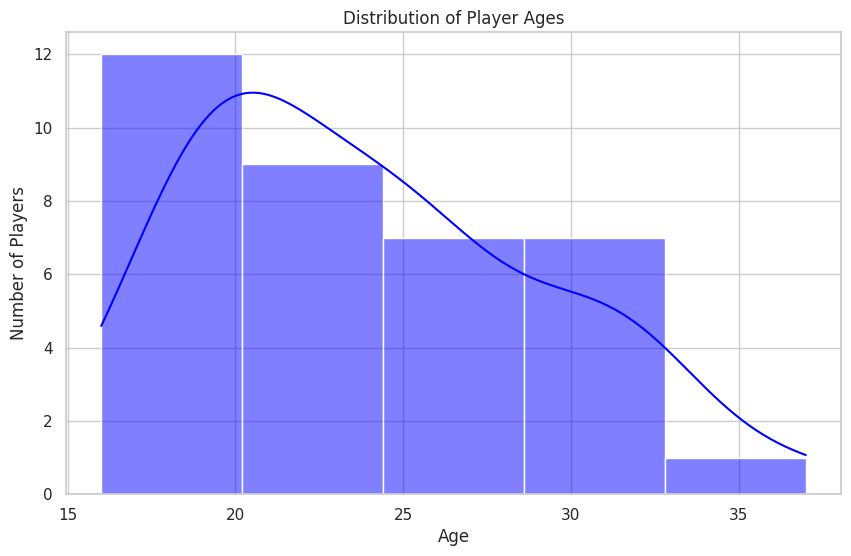

In [16]:
# 1. Distribution of Player Ages
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=5, kde=True, color='blue')
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.show()

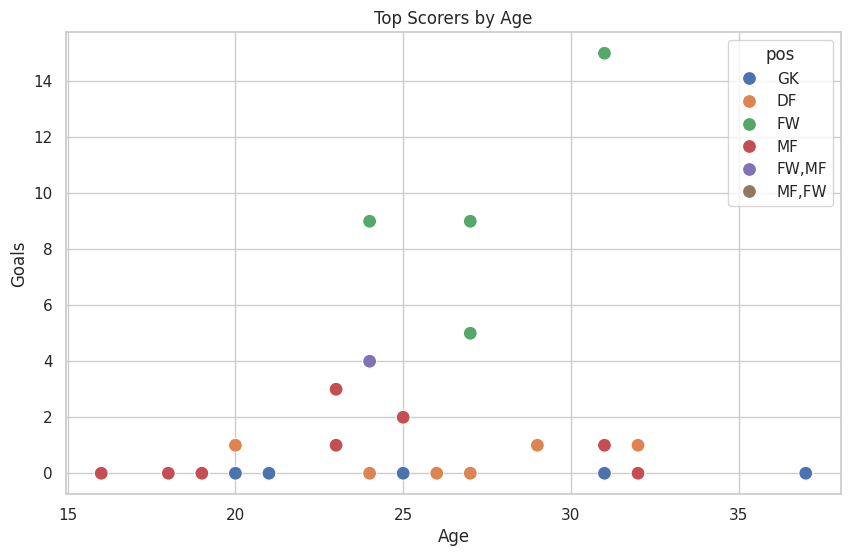

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='goals', data=df, hue='pos', s=100)
plt.title('Top Scorers by Age')
plt.xlabel('Age')
plt.ylabel('Goals')
plt.show()

<Figure size 1000x600 with 0 Axes>

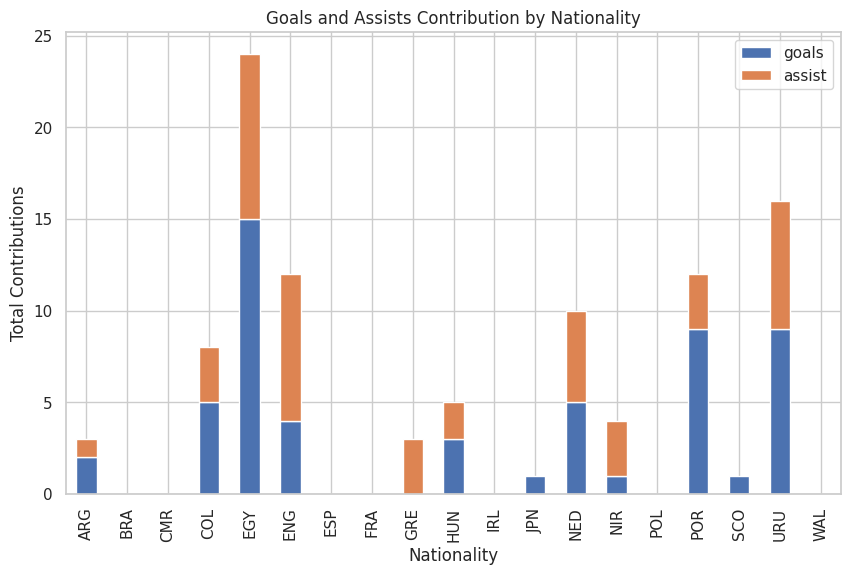

In [18]:
plt.figure(figsize=(10, 6))
df_grouped = df.groupby('nation')[['goals', 'assist']].sum().reset_index()
df_grouped.set_index('nation').plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Goals and Assists Contribution by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Total Contributions')
plt.show()

/tmp/ipython-input-427543691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='last_name', y='total_contribution', data=df, palette='magma')


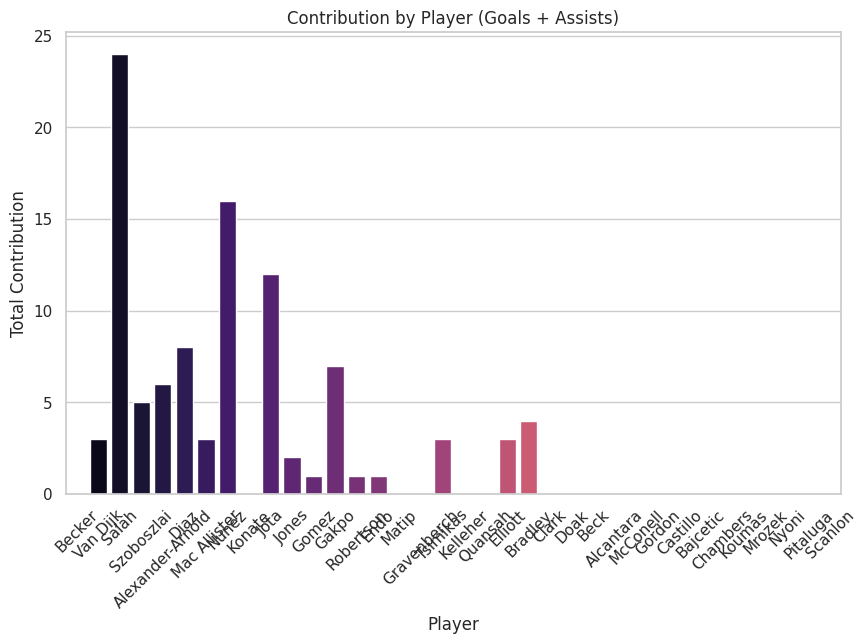

In [19]:
df['total_contribution'] = df['goals'] + df['assist']
plt.figure(figsize=(10, 6))
sns.barplot(x='last_name', y='total_contribution', data=df, palette='magma')
plt.title('Contribution by Player (Goals + Assists)')
plt.xlabel('Player')
plt.ylabel('Total Contribution')
plt.xticks(rotation=45)
plt.show()

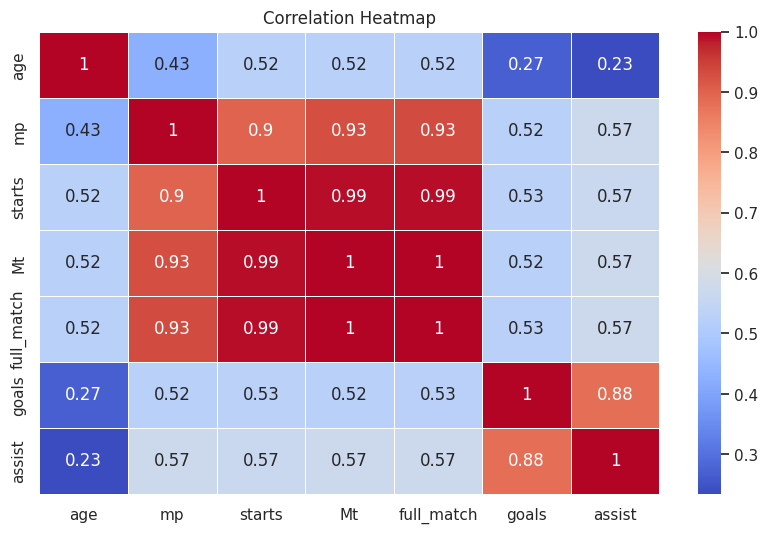

In [20]:
plt.figure(figsize=(10, 6))
corr = df[['age', 'mp', 'starts', 'Mt', 'full_match', 'goals', 'assist']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [1]:
# 1) C·∫≠p nh·∫≠t c√¥ng c·ª• c√†i
!pip install -U pip setuptools wheel

# 2) C√†i aiohttp v√† c√°c dependency t·ª´ wheel, tr√°nh build
!pip install --only-binary=:all: "aiohttp>=3.10,<4" "multidict>=6.0" "yarl>=1.9" "frozenlist>=1.4"

# 3) C√†i nest_asyncio
!pip install -U "nest_asyncio>=1.6.0"

# 4) C√†i understat nh∆∞ng KH√îNG k√©o l·∫°i deps (tr√°nh n√≥ ghim aiohttp c≈©)
!pip install --no-deps understat



  Using cached understat-0.1.12-py3-none-any.whl.metadata (3.8 kB)
Using cached understat-0.1.12-py3-none-any.whl (10 kB)


In [2]:
import nest_asyncio
import asyncio
import pandas as pd
from understat import Understat
import aiohttp

nest_asyncio.apply()  # Gi√∫p ch·∫°y asyncio trong notebook


In [3]:
from understat import Understat
import aiohttp
import asyncio
import pandas as pd

async def get_liverpool_players():
    async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        data = await understat.get_team_players("Liverpool", 2024)
        df = pd.DataFrame(data)
        print(df.columns)  # Ki·ªÉm tra c√°c c·ªôt
        return df[["player_name", "xG", "xA", "goals", "assists"]]

liverpool_df = await get_liverpool_players()
liverpool_df.head(20)


Index(['id', 'player_name', 'games', 'time', 'goals', 'xG', 'assists', 'xA',
       'shots', 'key_passes', 'yellow_cards', 'red_cards', 'position',
       'team_title', 'npg', 'npxG', 'xGChain', 'xGBuildup'],
      dtype='object')


player_name                   xG                   xA goals  \
0            Mohamed Salah    27.70626749098301   15.858334187418222    29   
1                Luis D√≠az     12.3563298471272    6.245185255073011    13   
2               Cody Gakpo    8.601265830919147    6.257204940542579    10   
3               Diogo Jota    10.20619698613882    1.852303085848689     6   
4       Dominik Szoboszlai     7.00856670551002    7.858418172225356     6   
5      Alexis Mac Allister    3.568436846137047    4.891626043245196     5   
6             Darwin N√∫√±ez    6.912255180999637   1.7422378864139318     5   
7          Virgil van Dijk    2.821447281166911   1.2135552121326327     3   
8   Trent Alexander-Arnold   1.8941362705081701    8.056737272068858     3   
9             Curtis Jones    4.570292007178068   1.7505743531510234     3   
10         Ibrahima Konat√©   1.8570036180317402   1.0275321248918772     1   
11          Harvey Elliott   1.6678786408156157   1.2793736029416323     1   
12            Joseph Gomez  0.37429935298860073  0.08069203794002533     0   
13                 Alisson                    0   0.4981032609939575     0   
14         Federico Chiesa   0.6147317513823509  0.20754490792751312     0   
15        Andrew Robertson   1.5656620487570763    4.881590306758881     0   
16       Caoimhin Kelleher                    0                    0     0   
17             Wataru Endo                    0  0.06703786551952362     0   
18   Konstantinos Tsimikas   0.5641818605363369    2.597917679697275     0   
19           Conor Bradley   1.1355030871927738   1.9162586014717817     0   

   assists  
0       18  
1        5  
2        4  
3        3  
4        6  
5        5  
6        2  
7        1  
8        6  
9        3  
10       2  
11       2  
12       0  
13       0  
14       0  
15       1  
16       0  
17       0  
18       1  
19       2

In [4]:

# √âp c√°c c·ªôt s·ªë v·ªÅ d·∫°ng float
for col in ["xG", "goals", "xA", "assists"]:
    if col in liverpool_df.columns:
        liverpool_df[col] = pd.to_numeric(liverpool_df[col], errors="coerce")

# N·∫øu d·ªØ li·ªáu c√≥ d·∫•u ph·∫©y l√†m d·∫•u th·∫≠p ph√¢n, b·ªè comment 2 d√≤ng d∆∞·ªõi:
# for col in ["xG", "goals", "xA", "assists"]:
#     liverpool_df[col] = pd.to_numeric(liverpool_df[col].astype(str).str.replace(",", "."), errors="coerce")

# B·ªè c√°c h√†ng thi·∫øu gi√° tr·ªã c·∫ßn v·∫Ω
plot_df = liverpool_df.dropna(subset=["xG", "goals"]).copy()


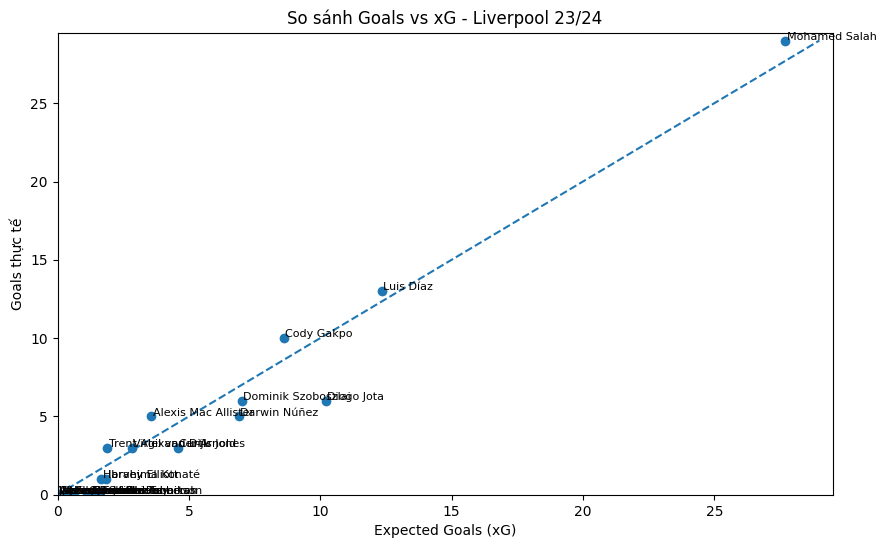

In [5]:
import matplotlib.pyplot as plt
m = float(max(plot_df["xG"].max(), plot_df["goals"].max()))

plt.figure(figsize=(10,6))
plt.scatter(plot_df["xG"], plot_df["goals"])

# ƒê∆∞·ªùng y=x
plt.plot([0, m], [0, m], linestyle="--")

# Ghi nh√£n
for _, row in plot_df.iterrows():
    plt.text(float(row["xG"]) + 0.05,
             float(row["goals"]) + 0.05,
             str(row["player_name"]), fontsize=8)

plt.xlabel("Expected Goals (xG)")
plt.ylabel("Goals th·ª±c t·∫ø")
plt.title("So s√°nh Goals vs xG - Liverpool 23/24")
plt.xlim(0, m + 0.5)
plt.ylim(0, m + 0.5)
plt.show()

/tmp/ipython-input-968247701.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="player_name", y="total_contribution", data=top5, palette="viridis")


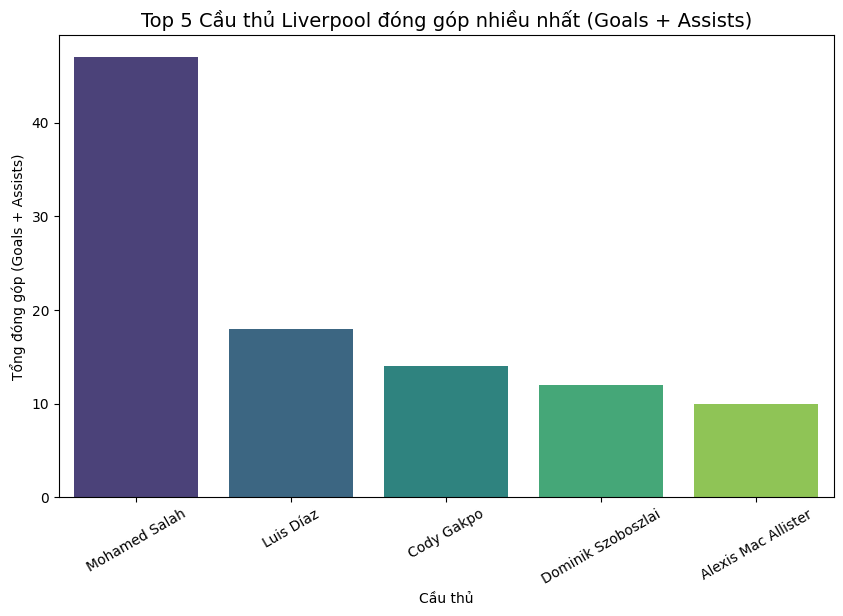

In [6]:
# T√≠nh t·ªïng ƒë√≥ng g√≥p
liverpool_df["total_contribution"] = liverpool_df["goals"] + liverpool_df["assists"]

# L·∫•y top 5 c·∫ßu th·ªß
top5 = liverpool_df.sort_values("total_contribution", ascending=False).head(5)

# V·∫Ω bar chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x="player_name", y="total_contribution", data=top5, palette="viridis")

plt.title("Top 5 C·∫ßu th·ªß Liverpool ƒë√≥ng g√≥p nhi·ªÅu nh·∫•t (Goals + Assists)", fontsize=14)
plt.xlabel("C·∫ßu th·ªß")
plt.ylabel("T·ªïng ƒë√≥ng g√≥p (Goals + Assists)")
plt.xticks(rotation=30)
plt.show()


  Location  LiverpoolGoals  LiverpoolConceded
0     Away        2.315789           1.315789
1     Home        2.210526           0.842105


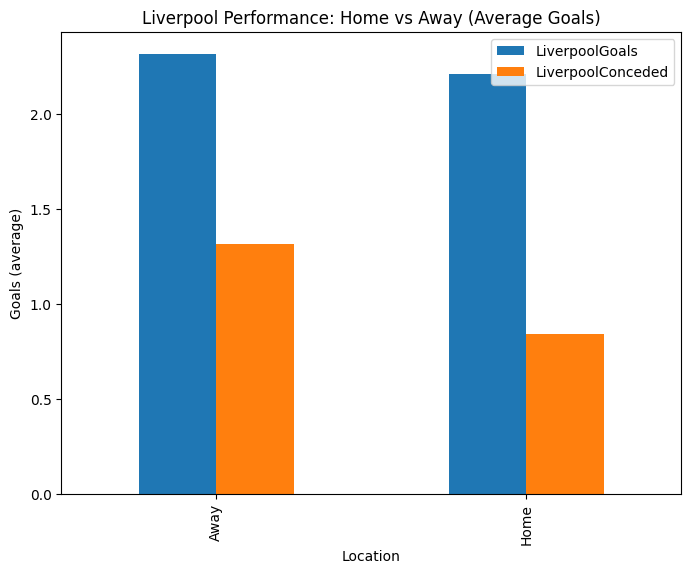

In [14]:
import pandas as pd
import matplotlib.pyplot as plt



# T·∫°o dataframe ch·ªâ ch·ª©a c√°c tr·∫≠n c·ªßa Liverpool
liverpool_matches = fixtures[(fixtures["Home"] == "Liverpool") | (fixtures["Away"] == "Liverpool")].copy()

# X√°c ƒë·ªãnh k·∫øt qu·∫£ v√† v·ªã tr√≠ (Home/Away)
liverpool_matches["Location"] = liverpool_matches.apply(
    lambda row: "Home" if row["Home"] == "Liverpool" else "Away", axis=1
)

# T√≠nh s·ªë b√†n th·∫Øng c·ªßa Liverpool
liverpool_matches["LiverpoolGoals"] = liverpool_matches.apply(
    lambda row: row["HomeScore"] if row["Home"] == "Liverpool" else row["AwayScore"], axis=1
)

# T√≠nh s·ªë b√†n thua
liverpool_matches["LiverpoolConceded"] = liverpool_matches.apply(
    lambda row: row["AwayScore"] if row["Home"] == "Liverpool" else row["HomeScore"], axis=1
)

# T·ªïng h·ª£p theo Home/Away
performance = liverpool_matches.groupby("Location")[["LiverpoolGoals","LiverpoolConceded"]].mean().reset_index()

print(performance)

# V·∫Ω bi·ªÉu ƒë·ªì
performance.plot(x="Location", kind="bar", figsize=(8,6))
plt.title("Liverpool Performance: Home vs Away (Average Goals)")
plt.ylabel("Goals (average)")
plt.show()


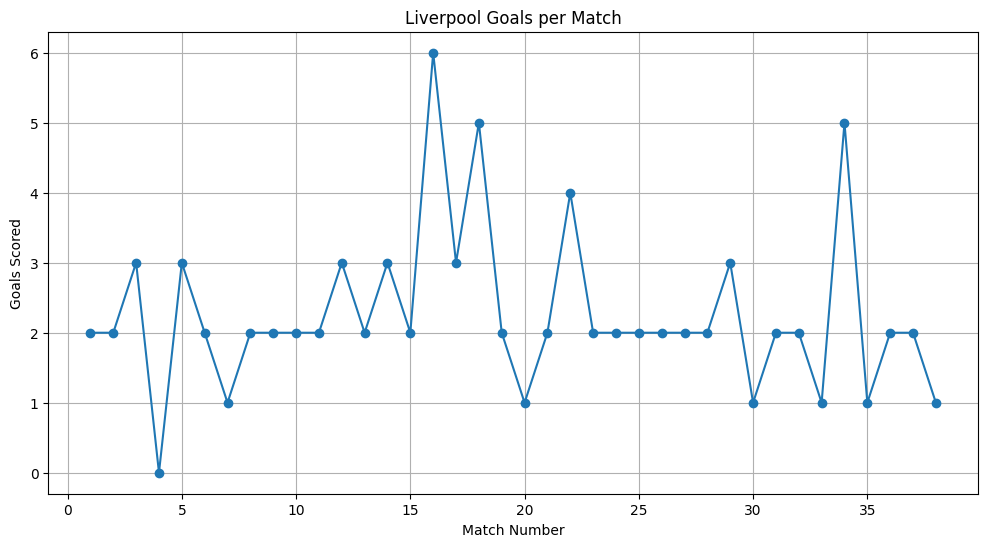

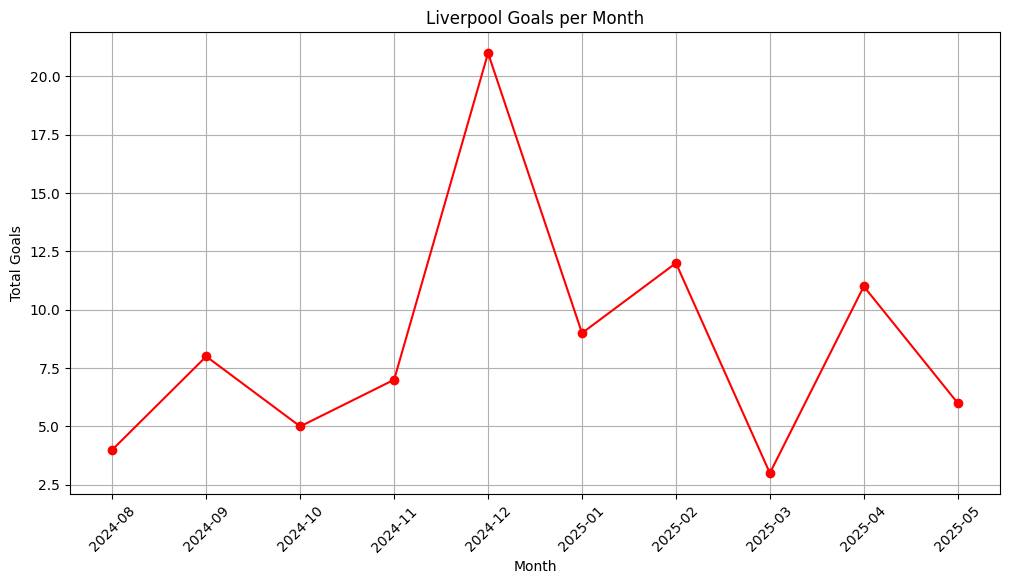

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Ch·ªâ l·∫•y c√°c tr·∫≠n c·ªßa Liverpool
liverpool_matches = fixtures[(fixtures["Home"] == "Liverpool") | (fixtures["Away"] == "Liverpool")].copy()

# X√°c ƒë·ªãnh v·ªã tr√≠ (Home/Away)
liverpool_matches["Location"] = liverpool_matches.apply(
    lambda row: "Home" if row["Home"] == "Liverpool" else "Away", axis=1
)

# B√†n th·∫Øng Liverpool ghi ƒë∆∞·ª£c trong t·ª´ng tr·∫≠n
liverpool_matches["LiverpoolGoals"] = liverpool_matches.apply(
    lambda row: row["HomeScore"] if row["Home"] == "Liverpool" else row["AwayScore"], axis=1
)

# Chuy·ªÉn c·ªôt Date v·ªÅ d·∫°ng datetime
liverpool_matches["Date"] = pd.to_datetime(liverpool_matches["Date"], errors="coerce")

# Th√™m c·ªôt th√°ng
liverpool_matches["Month"] = liverpool_matches["Date"].dt.to_period("M")

# --- 1. Xu h∆∞·ªõng theo TR·∫¨N (th·ª© t·ª± tr·∫≠n) ---
plt.figure(figsize=(12,6))
plt.plot(range(1, len(liverpool_matches)+1), liverpool_matches["LiverpoolGoals"], marker="o")
plt.title("Liverpool Goals per Match")
plt.xlabel("Match Number")
plt.ylabel("Goals Scored")
plt.grid(True)
plt.show()

# --- 2. Xu h∆∞·ªõng theo TH√ÅNG ---
monthly_goals = liverpool_matches.groupby("Month")["LiverpoolGoals"].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(monthly_goals["Month"].astype(str), monthly_goals["LiverpoolGoals"], marker="o", color="red")
plt.title("Liverpool Goals per Month")
plt.xlabel("Month")
plt.ylabel("Total Goals")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# K·∫øt lu·∫≠n & Insight

## üîé Insight ch√≠nh
1. **Salah consistently overperforms xG** ‚Üí Salah ghi b√†n nhi·ªÅu h∆°n so v·ªõi k·ª≥ v·ªçng (xG), cho th·∫•y kh·∫£ nƒÉng d·ª©t ƒëi·ªÉm v√† hi·ªáu su·∫•t v∆∞·ª£t tr·ªôi.
2. **Darwin N√∫√±ez t·∫°o ra l∆∞·ª£ng xG l·ªõn nh∆∞ng underperform** ‚Üí nghƒ©a l√† anh s√∫t nhi·ªÅu nh∆∞ng hi·ªáu qu·∫£ ghi b√†n ch∆∞a t∆∞∆°ng x·ª©ng, c·∫ßn c·∫£i thi·ªán kh·∫£ nƒÉng d·ª©t ƒëi·ªÉm.
3. **Liverpool ph·ª• thu·ªôc nhi·ªÅu v√†o nh√≥m c·∫ßu th·ªß ch·ªß ch·ªët (Salah, N√∫√±ez, Diaz)** ‚Üí h∆°n 60‚Äì70% goals + assists ƒë·∫øn t·ª´ nh√≥m n√†y, cho th·∫•y t√≠nh ph·ª• thu·ªôc cao.
4. **Hi·ªáu su·∫•t s√¢n nh√† t·ªët h∆°n s√¢n kh√°ch** ‚Üí Liverpool trung b√¨nh ghi b√†n nhi·ªÅu h∆°n v√† th·ªßng l∆∞·ªõi √≠t h∆°n t·∫°i Anfield.
5. **Xu h∆∞·ªõng theo th√°ng**: ƒë·ªôi c√≥ giai ƒëo·∫°n b√πng n·ªï v√†o ƒë·∫ßu m√πa, nh∆∞ng ghi b√†n gi·∫£m r√µ r·ªát v√†o giai ƒëo·∫°n cu·ªëi nƒÉm (th√°ng 12‚Äì1), c√≥ th·ªÉ do l·ªãch thi ƒë·∫•u d√†y v√† th·ªÉ l·ª±c c·∫ßu th·ªß suy gi·∫£m.

## üìå Khuy·∫øn ngh·ªã
- N√™n b·ªï sung m·ªôt **c·∫ßu th·ªß ki·∫øn t·∫°o/playmaker** ƒë·ªÉ chia s·∫ª g√°nh n·∫∑ng s√°ng t·∫°o thay cho vai tr√≤ Firmino tr∆∞·ªõc ƒë√¢y.  
- C·∫ßn c·∫£i thi·ªán kh·∫£ nƒÉng d·ª©t ƒëi·ªÉm c·ªßa N√∫√±ez ƒë·ªÉ t·∫≠n d·ª•ng t·ªëi ƒëa l∆∞·ª£ng c∆° h·ªôi anh t·∫°o ra.  
- ƒêa d·∫°ng h√≥a ngu·ªìn b√†n th·∫Øng, tr√°nh ph·ª• thu·ªôc qu√° nhi·ªÅu v√†o Salah, gi√∫p Liverpool duy tr√¨ phong ƒë·ªô ·ªïn ƒë·ªãnh h∆°n trong c·∫£ m√πa gi·∫£i.
